In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
import os

In [2]:
def get_centra_performance(version=8):
    centra_perf = "/nobackup/blia/exp_data/sers_fl_fed_avg/centralised_lr_0.100_version_%d_n_clients_1_arch_vit/communication_round_000/client_id_00/training_statistics.txt" % version
    with open(centra_perf, 'r') as f:
        content = f.readlines()
    sub = [v for v in content if "seed" in v][0]
    print(sub)
    val_perf = [v for v in content if "validation" in v]
    val_loss = [float(v.split("loss:")[1].split(" and")[0]) for v in val_perf]
    val_accu = [float(v.split("accuracy ")[1].split("\n")[0])  for v in val_perf] 
    if np.max(val_accu) > 1.0:
        val_accu = [q * 20 * 187 / 2 / 350 / 8 for q in val_accu]
    return np.array(val_accu) #, content 

The initial seed is: 8799

The initial seed is: 8810

The initial seed is: 16011



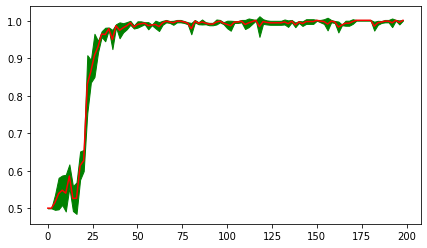

In [9]:
val_accu_group = [get_centra_performance(v) for v in [0, 2, 3]]
avg_val_accu, std_val_accu = np.mean(val_accu_group, axis=0), np.std(val_accu_group, axis=0) * 1.95 / np.sqrt(len(val_accu_group))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
color_group = ['r', 'g', 'b', 'm']
ax.plot(np.arange(np.shape(val_accu_group)[1]) * 2, np.mean(val_accu_group, axis=0), 'r')
ax.fill_between(np.arange(np.shape(val_accu_group)[1]) * 2, 
                 np.mean(val_accu_group, axis=0) - np.std(val_accu_group, axis=0) * 1.95 / np.sqrt(len(val_accu_group)), 
                 np.mean(val_accu_group, axis=0) + np.std(val_accu_group, axis=0) * 1.95 / np.sqrt(len(val_accu_group)), 
                color='g')

Text(0, 0.5, 'Test accuracy')

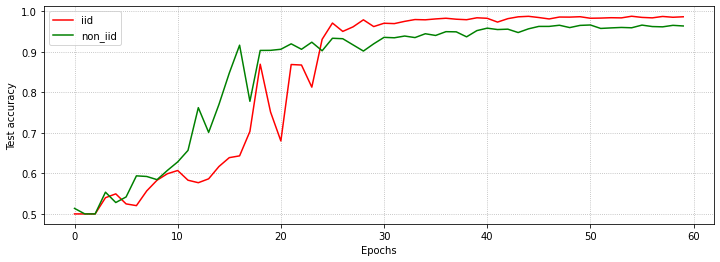

In [8]:
path = "../exp_data/sers_fl_fed_avg/"
str_use = "iid"
performance = {}
for i, s_str in enumerate(["iid", "non_iid"]):
    sub_dir = sorted([v for v in os.listdir(path) if "centralised" not in v and s_str in v])
    if s_str == "iid":
        sub_dir = [v for v in sub_dir if "non_" not in v]
    perf = []
    for j, s_path in enumerate(sub_dir):
        if "statistics.obj" in os.listdir(path + s_path):
            v = pickle.load(open(path + s_path + "/statistics.obj", "rb"))
            perf.append(v["aggregate_accuracy"][:60])
    performance["%s" % s_str] = [np.mean(perf, axis=0), np.std(perf, axis=0) * 1.95 / np.sqrt(len(perf))]



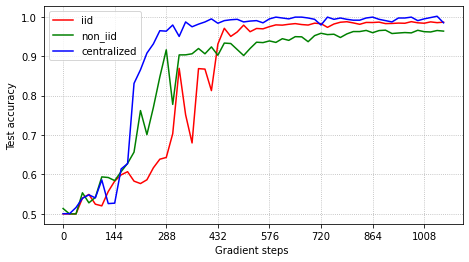

In [21]:
avg_val_accu = avg_val_accu[:60]
fig = plt.figure(figsize=(7.5, 4))
ax = fig.add_subplot(111)
color_group = ['r', 'g', 'b']
for i, s_str in enumerate(["iid", "non_iid"]):
    s_perf = performance["%s" % s_str]
    ax.plot(s_perf[0], color=color_group[i], label=s_str)
ax.plot(avg_val_accu, color=color_group[-1], label="centralized")

ax.set_xticks(np.arange(len(avg_val_accu))[::8])

ax.set_xticklabels(["%s" % (v * 18) for v in np.arange(len(avg_val_accu))[::8]])
ax.legend(loc='best')
ax.grid(ls=':')
ax.set_xlabel("Gradient steps ")
ax.set_ylabel("Test accuracy")
# plt.savefig("../exp_data/sers_fl_fed_avg/performance_comparison.pdf", pad_inches=0, bbox_inches='tight')